In [17]:
#by Alex Vogt 2152320
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [18]:
def h(theta,X):
    return np.dot(theta,X)

def  cal_cost(theta,X,y):
    m = len(y) 
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def closedFormSol(X, y):
    invX = np.linalg.inv(np.dot(X.T,X))
    theta = np.dot(invX, np.dot(X.T, y))
    return theta

def linearRegression(alpha, X, y, eps):
    theta = np.zeros((X.shape[1],1))
    num_iter =0
    theta_old = 1
    
    cost_history = np.array((1,1))
    theta_history = theta.T
    
    while np.linalg.norm((theta- theta_old),2) >= eps:
        h_theta = h(X,theta)
        theta_old = theta
        
        theta = theta - alpha *((1/len(y)*(X.T.dot((h_theta-y)))))
        num_iter +=1
        theta_history = np.append(theta_history,theta.T,axis=0)
        cost_history  = np.append(cost_history,cal_cost(theta,X,y))
        
    return theta, num_iter, cost_history, theta_history 



def linear_reg_with_regularization(alpha, X, y,eps,lamda):
    theta = np.zeros((X.shape[1],1))
    num_iter =0
    theta_old = 1
    theta_0 = 0
    while np.linalg.norm((theta- theta_old),2) >= eps:
        h_theta = h(X,theta)
        theta_old = theta
        theta_0 = theta[0] - alpha *((1/len(y)*(np.sum((h_theta-y)))))
        theta = theta*(1-alpha*(lamda/len(y))) - alpha *((1/len(y)*(X.T.dot((h_theta-y)))))
        theta[0] = theta_0
        num_iter +=1
        
    return theta, num_iter

In [19]:
#read in my data as np
np_data = np.genfromtxt('kc_house_data.csv', delimiter =',')
nRow, nCol = np_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21598 rows and 21 columns


In [20]:
#read in data as dataframe
data = pd.read_csv('kc_house_data.csv')
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21597 rows and 21 columns


In [21]:
data.head()
#drop columns that are not numerical for ease of the assignement
data = data.drop(columns=['id','date','sqft_lot','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','floors','condition','zipcode','lat','long','sqft_living15','sqft_lot15'])
data.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7
1,538000.0,3,2.25,2570,7
2,180000.0,2,1.00,770,6
3,604000.0,4,3.00,1960,7
4,510000.0,3,2.00,1680,8


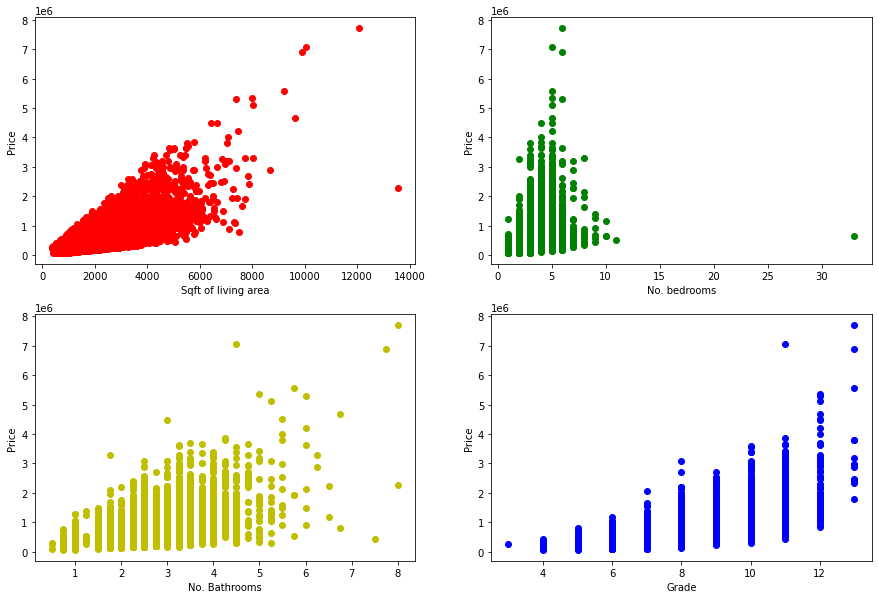

In [22]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0,0].scatter(x = data['sqft_living'], y = data['price'], color = 'r')
ax[0,0].set_xlabel('Sqft of living area')
ax[0,0].set_ylabel('Price')
ax[0,1].scatter(x = data['bedrooms'], y = data['price'], color = 'g')
ax[0,1].set_xlabel('No. bedrooms')
ax[0,1].set_ylabel('Price')
ax[1,0].scatter(x = data['bathrooms'], y = data['price'],color = 'y')
ax[1,0].set_xlabel('No. Bathrooms')
ax[1,0].set_ylabel('Price')
ax[1,1].scatter(x = data['grade'], y = data['price'],color = 'b')
ax[1,1].set_xlabel('Grade')
ax[1,1].set_ylabel('Price')

plt.show()

In [23]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,grade
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,7.657915
std,3.673681e+05,0.926299,0.768984,918.106125,1.173200
min,7.800000e+04,1.000000,0.500000,370.000000,3.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000


In [24]:
#looking at the table above we can see that we do not have zero mean and unit varience which means our model will not train
#very well and converge smoothly so we perfrom some feature standardization to achieve this 

data['price'] = data['price']/100000

#apply feature standardization
data['bedrooms'] = (data['bedrooms']- data['bedrooms'].mean())/data['bedrooms'].std()
data['bathrooms'] = (data['bathrooms']- data['bathrooms'].mean())/data['bathrooms'].std()
data['sqft_living'] = (data['sqft_living']- data['sqft_living'].mean())/data['sqft_living'].std()
data['grade'] = (data['grade']- data['grade'].mean())/data['grade'].std()
data.describe()

,price,bedrooms,bathrooms,sqft_living,grade
count,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,5.402966,-1.580560e-15,-2.207430e-15,-1.857928e-16,1.586436e-14
std,3.673681,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.780000,-2.562024e+00,-2.101247e+00,-1.862880e+00,-3.970267e+00
25%,3.220000,-4.028937e-01,-4.757266e-01,-7.083297e-01,-5.607873e-01
50%,4.500000,-4.028937e-01,1.744818e-01,-1.855143e-01,-5.607873e-01
75%,6.450000,6.766715e-01,4.995859e-01,5.115728e-01,2.915825e-01
max,77.000000,3.198406e+01,7.651878e+00,1.248187e+01,4.553432e+00


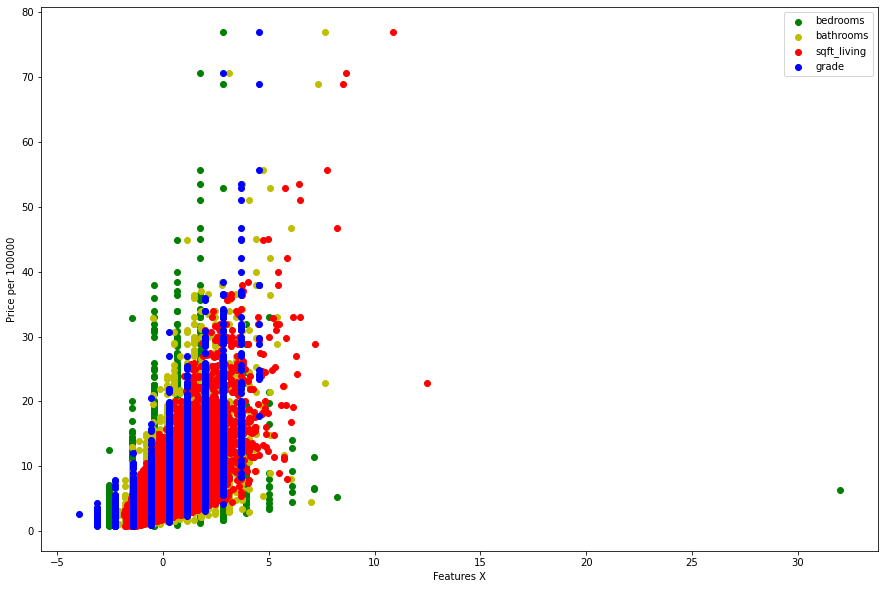

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(x = data['bedrooms'], y = data['price'], color = 'g',label= 'bedrooms')
ax.scatter(x = data['bathrooms'], y = data['price'],color = 'y',label= 'bathrooms')
ax.scatter(x = data['sqft_living'], y = data['price'], color = 'r',label= 'sqft_living')
ax.scatter(x = data['grade'], y = data['price'],color = 'b',label= 'grade')
plt.xlabel("Features X")
plt.legend()
plt.ylabel("Price per 100000")

plt.show()

In [26]:
#we can see that there is an outlier for the bedrooms that will drastically affect the LR model so we are going to remove it

#Finding and removing outliers for bedrooms
print("Highest allowed",data['bedrooms'].mean() + 3*data['bedrooms'].std())
print("Lowest allowed",data['bedrooms'].mean() - 3*data['bedrooms'].std())

#now to impose the limit on the data
upper_limit_bedrooms = data['bedrooms'].mean() + 3*data['bedrooms'].std()
lower_limit_bedrooms = data['bedrooms'].mean() - 3*data['bedrooms'].std()
data['bedrooms'] = np.where(
    data['bedrooms']>upper_limit_bedrooms,
    upper_limit_bedrooms,
    np.where(
        data['bedrooms']<lower_limit_bedrooms,
        lower_limit_bedrooms,
        data['bedrooms']
    )
)

Highest allowed 3.000000000000419
Lowest allowed -3.0000000000004228


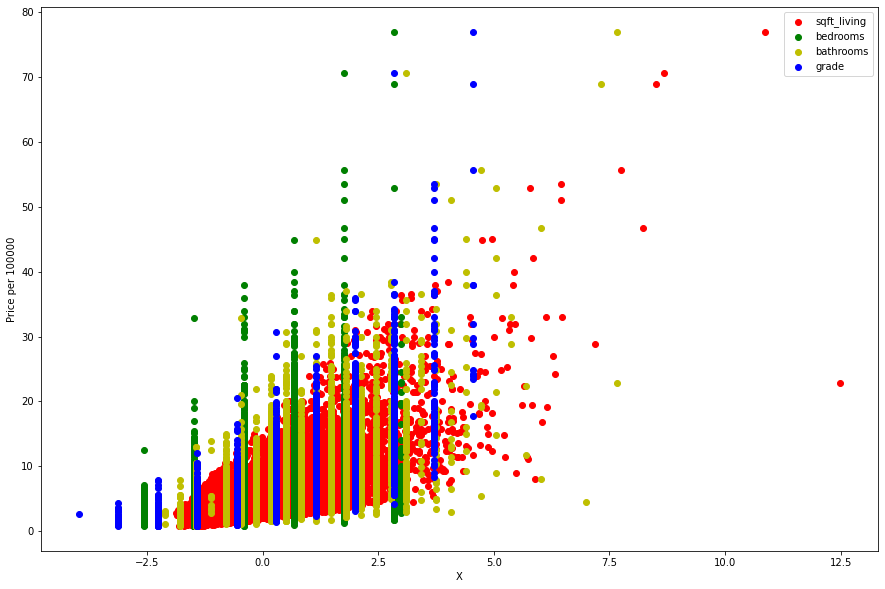

In [27]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(x = data['sqft_living'], y = data['price'], color = 'r',label= 'sqft_living')
ax.scatter(x = data['bedrooms'], y = data['price'], color = 'g',label= 'bedrooms')
ax.scatter(x = data['bathrooms'], y = data['price'],color = 'y',label= 'bathrooms')
ax.scatter(x = data['grade'], y = data['price'],color = 'b',label= 'grade')
plt.xlabel("X")
plt.legend()
plt.ylabel("Price per 100000")

plt.show()

In [28]:
data.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,2.219,-0.402894,-1.451039,-0.980629,-0.560787
1,5.380,-0.402894,0.174482,0.533357,-0.560787
2,1.800,-1.482459,-1.451039,-1.427201,-1.413157
3,6.040,0.676671,1.149794,-0.131054,-0.560787
4,5.100,-0.402894,-0.150622,-0.436030,0.291583


In [29]:
#split into training an test data
data_train, data_test = train_test_split(data,random_state =8,shuffle=True)

In [30]:
#get y column and get remove it from the data

y_train = data_train.loc[:,'price']
y_test = data_test.loc[:,'price']
data_train= data_train.drop(columns =['price'])
data_test= data_test.drop(columns =['price'])


In [31]:
#turn them into numpy arrays

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = data_train.to_numpy()
X_test = data_test.to_numpy()

In [32]:
#reshape
y_train = y_train.reshape((len(y_train),1))
y_test = y_test.reshape((len(y_test),1))
X_train = X_train.reshape((len(X_train), 4))
X_test = X_test.reshape((len(X_test), 4))

In [33]:
#add bias to the features

bias_train = np.ones((len(X_train),1))
bias_test = np.ones((len(X_test),1))
X_train = np.hstack((bias_train,X_train))
X_test = np.hstack((bias_test,X_test))
print(X_train)
print(X_test)

[[ 1.         -0.40289369  1.47489842 -0.76278965  0.29158255]
 [ 1.         -0.40289369 -0.47572658 -0.23997427 -1.41315711]
 [ 1.          0.67667145 -1.45103909 -0.75189766 -0.56078728]
 ...
 [ 1.         -0.40289369 -1.45103909 -0.68654574 -0.56078728]
 [ 1.          0.67667145  1.14979426  1.76415134  1.99632221]
 [ 1.         -1.48245884 -0.80083075 -0.91527747 -1.41315711]]
[[ 1.          0.67667145 -0.80083075 -0.78457362 -0.56078728]
 [ 1.         -0.40289369  0.17448175 -0.18551434 -0.56078728]
 [ 1.          0.67667145  0.17448175  1.28490391  1.14395238]
 ...
 [ 1.         -0.40289369 -1.45103909 -1.20936112 -1.41315711]
 [ 1.         -0.40289369  0.82469009  0.75119655  0.29158255]
 [ 1.          0.67667145  0.49958592  0.43532892  1.99632221]]


In [34]:
#Closed form solution
ClosedForm = closedFormSol(X_train,y_train)
print(ClosedForm)

[[ 5.3994537 ]
 [-0.44619418]
 [-0.17288713]
 [ 2.11133615]
 [ 1.12322325]]


We will use a learning rate of alpha = 0.015 

Using a learning rate of 0.015 does allow for convergence however looking at the extremely large number of
iterations its clear that 0.015 is too small of a step size
final theta values: 
 [[ 5.39945439]
 [-0.44609712]
 [-0.17281893]
 [ 2.11104123]
 [ 1.12340029]] 

actual theta values: 
 [[ 5.3994537 ]
 [-0.44619418]
 [-0.17288713]
 [ 2.11133615]
 [ 1.12322325]] 

Number of iterations: 
 2983 

Cost History: 
 [5.43121702e+09 5.25660061e+09 5.09046837e+09 ... 8.09546641e+08
 8.09546641e+08 8.09546641e+08] 

Theta History: 
 [[ 0.          0.          0.          0.          0.        ]
 [ 0.08106608  0.01657815  0.02968874  0.03917354  0.03705392]
 [ 0.16091451  0.0321646   0.05797705  0.07684296  0.07271025]
 ...
 [ 5.39945439 -0.44609659 -0.17281855  2.1110396   1.12340126]
 [ 5.39945439 -0.44609685 -0.17281874  2.11104042  1.12340077]
 [ 5.39945439 -0.44609712 -0.17281893  2.11104123  1.12340029]] 



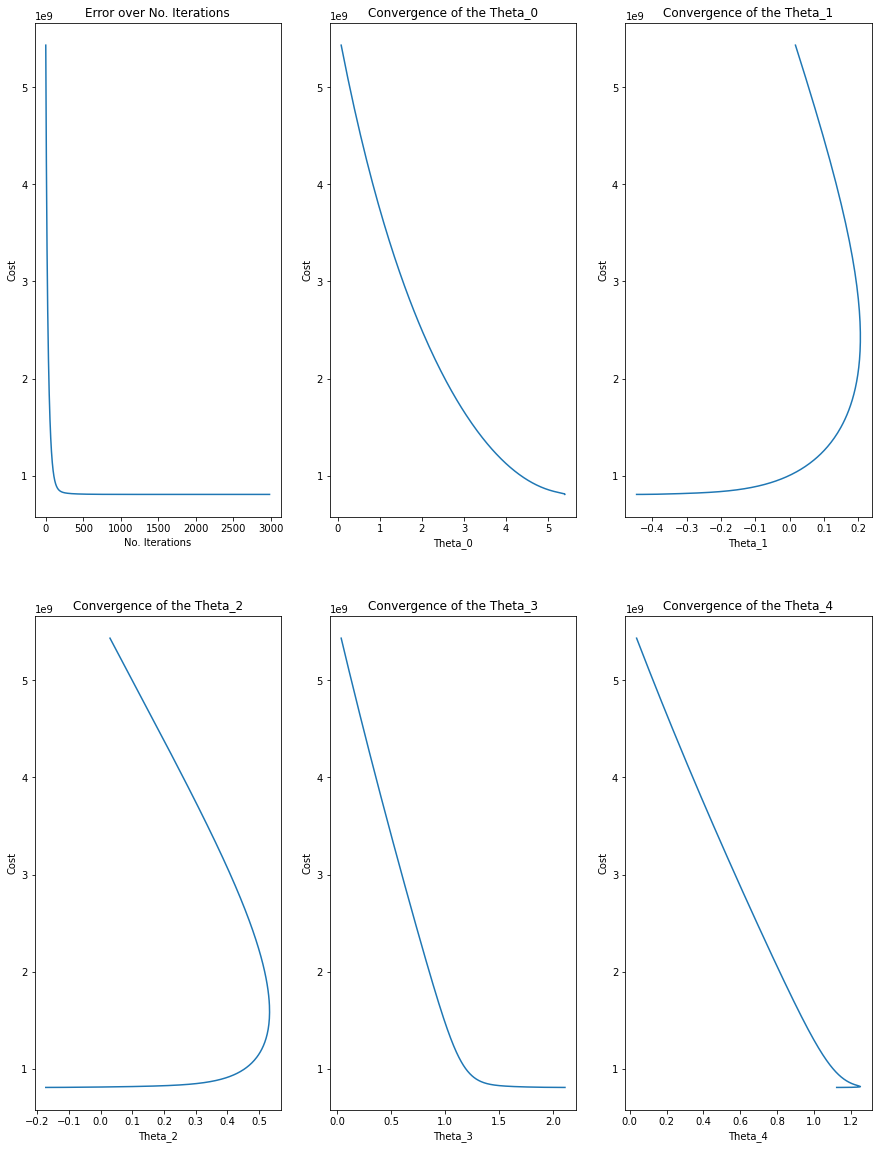

In [36]:
#using an alpha that is too small, causes slow convergence and large number of iterations

print("We will use a learning rate of alpha = 0.015",'\n')
print("Using a learning rate of 0.015 does allow for convergence however looking at the extremely large number of")
print("iterations its clear that 0.015 is too small of a step size")

Linear_Regression_output = linearRegression(0.015,X_train,y_train, 0.000001)
print("final theta values:",'\n' ,Linear_Regression_output[0],'\n')
print("actual theta values:", '\n',closedFormSol(X_train,y_train),'\n')
print("Number of iterations:",'\n' ,Linear_Regression_output[1],'\n')
print("Cost History:",'\n' ,Linear_Regression_output[2][2:],'\n')
print("Theta History:",'\n' ,Linear_Regression_output[3],'\n')

XVals = np.arange(Linear_Regression_output[1])
fig, ax = plt.subplots(2,3, figsize = (15,20))
ax[0][0].plot(XVals,Linear_Regression_output[2][2:])
ax[0][0].set_xlabel('No. Iterations')
ax[0][0].set_ylabel('Cost')
ax[0][0].set_title('Error over No. Iterations')

ax[0][1].plot(Linear_Regression_output[3][1:,0:1],Linear_Regression_output[2][2:])
ax[0][1].set_xlabel('Theta_0')
ax[0][1].set_ylabel('Cost')
ax[0][1].set_title('Convergence of the Theta_0')

ax[0][2].plot(Linear_Regression_output[3][1:,1:2],Linear_Regression_output[2][2:])
ax[0][2].set_xlabel('Theta_1')
ax[0][2].set_ylabel('Cost')
ax[0][2].set_title('Convergence of the Theta_1')

ax[1][0].plot(Linear_Regression_output[3][1:,2:3],Linear_Regression_output[2][2:])
ax[1][0].set_xlabel('Theta_2')
ax[1][0].set_ylabel('Cost')
ax[1][0].set_title('Convergence of the Theta_2')

ax[1][1].plot(Linear_Regression_output[3][1:,3:4],Linear_Regression_output[2][2:])
ax[1][1].set_xlabel('Theta_3')
ax[1][1].set_ylabel('Cost')
ax[1][1].set_title('Convergence of the Theta_3')

ax[1][2].plot(Linear_Regression_output[3][1:,4:5],Linear_Regression_output[2][2:])
ax[1][2].set_xlabel('Theta_4')
ax[1][2].set_ylabel('Cost')
ax[1][2].set_title('Convergence of the Theta_4')

plt.show()

We will use a learning rate of alpha = 0.08 

Using a learing rate of 0.08 we can see that the we still converge to the correct Theta values but in much fewer
iterations than compared using alpha=0.015 so 0.08 could be an optimal alpha
final theta values: 
 [[ 5.39945383]
 [-0.44617629]
 [-0.1728747 ]
 [ 2.11128192]
 [ 1.12325588]] 

actual theta values: 
 [[ 5.3994537 ]
 [-0.44619418]
 [-0.17288713]
 [ 2.11133615]
 [ 1.12322325]] 

Number of iterations: 
 671 

Cost History: 
 [4.68935582e+09 3.98636237e+09 3.43906311e+09 3.00406346e+09
 2.65250254e+09 2.36464817e+09 2.12660089e+09 1.92826767e+09
 1.76210253e+09 1.62231260e+09 1.50434859e+09 1.40457034e+09
 1.32002172e+09 1.24827452e+09 1.18731698e+09 1.13547178e+09
 1.09133386e+09 1.05372227e+09 1.02164196e+09 9.94253024e+08
 9.70845547e+08 9.50818942e+08 9.33664714e+08 9.18952100e+08
 9.06316017e+08 8.95446927e+08 8.86082297e+08 8.77999389e+08
 8.71009174e+08 8.64951179e+08 8.59689130e+08 8.55107267e+08
 8.51107220e+08 8.47605367e+0

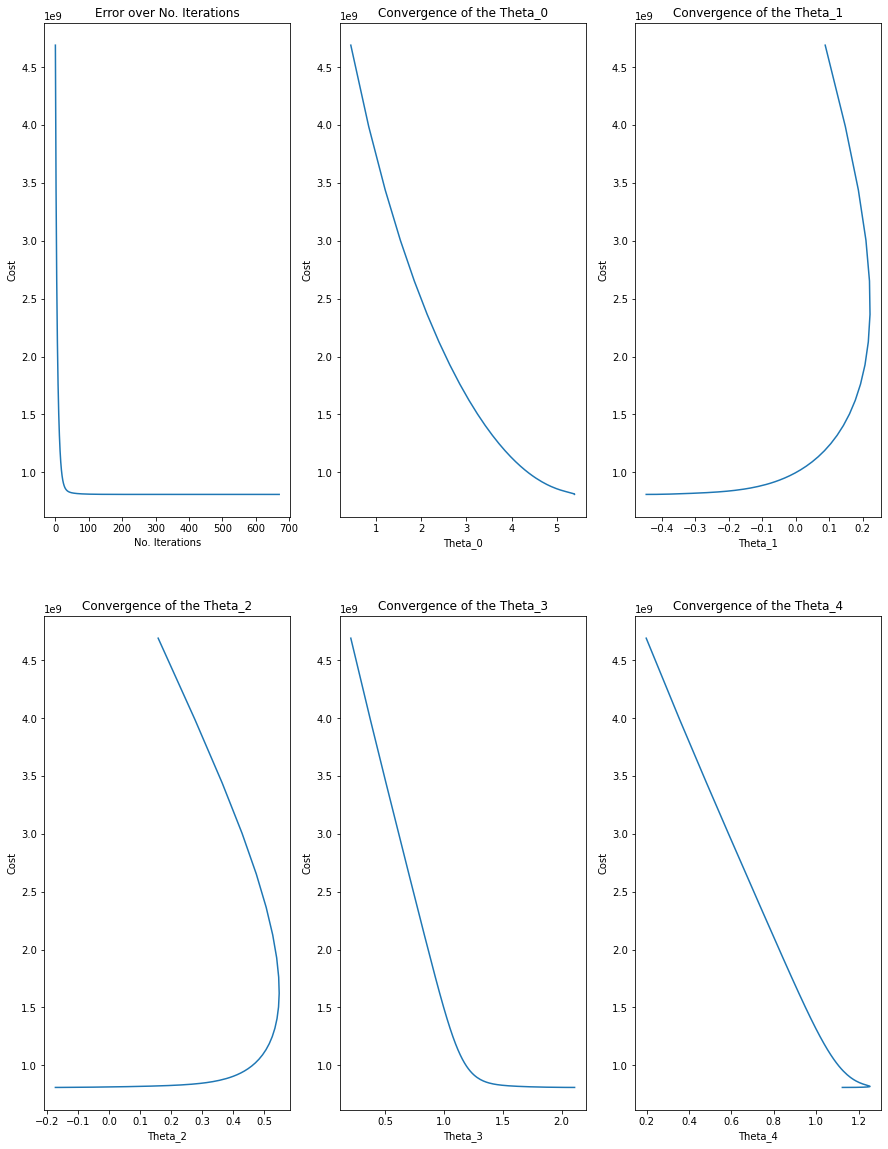

In [37]:
#using a good alpha value

print("We will use a learning rate of alpha = 0.08",'\n')
print("Using a learing rate of 0.08 we can see that the we still converge to the correct Theta values but in much fewer")
print("iterations than compared using alpha=0.015 so 0.08 could be an optimal alpha")

Linear_Regression_output = linearRegression(0.08,X_train,y_train, 0.000001)
print("final theta values:",'\n' ,Linear_Regression_output[0],'\n')
print("actual theta values:", '\n',closedFormSol(X_train,y_train),'\n')
print("Number of iterations:",'\n' ,Linear_Regression_output[1],'\n')
print("Cost History:",'\n' ,Linear_Regression_output[2][2:],'\n')
print("Theta History:",'\n' ,Linear_Regression_output[3],'\n')

XVals = np.arange(Linear_Regression_output[1])
fig, ax = plt.subplots(2,3, figsize = (15,20))
ax[0][0].plot(XVals,Linear_Regression_output[2][2:])
ax[0][0].set_xlabel('No. Iterations')
ax[0][0].set_ylabel('Cost')
ax[0][0].set_title('Error over No. Iterations')

ax[0][1].plot(Linear_Regression_output[3][1:,0:1],Linear_Regression_output[2][2:])
ax[0][1].set_xlabel('Theta_0')
ax[0][1].set_ylabel('Cost')
ax[0][1].set_title('Convergence of the Theta_0')

ax[0][2].plot(Linear_Regression_output[3][1:,1:2],Linear_Regression_output[2][2:])
ax[0][2].set_xlabel('Theta_1')
ax[0][2].set_ylabel('Cost')
ax[0][2].set_title('Convergence of the Theta_1')

ax[1][0].plot(Linear_Regression_output[3][1:,2:3],Linear_Regression_output[2][2:])
ax[1][0].set_xlabel('Theta_2')
ax[1][0].set_ylabel('Cost')
ax[1][0].set_title('Convergence of the Theta_2')

ax[1][1].plot(Linear_Regression_output[3][1:,3:4],Linear_Regression_output[2][2:])
ax[1][1].set_xlabel('Theta_3')
ax[1][1].set_ylabel('Cost')
ax[1][1].set_title('Convergence of the Theta_3')

ax[1][2].plot(Linear_Regression_output[3][1:,4:5],Linear_Regression_output[2][2:])
ax[1][2].set_xlabel('Theta_4')
ax[1][2].set_ylabel('Cost')
ax[1][2].set_title('Convergence of the Theta_4')

plt.show()

We will use a learning rate of alpha = 0.6 

Using a learing of 0.6 we are taking very large setp sizes and results in very gagged convergenceand some of the
were overshot
final theta values: 
 [[ 5.39945372]
 [-0.44619218]
 [-0.17288575]
 [ 2.11133011]
 [ 1.12322689]] 

actual theta values: 
 [[ 5.40048193]
 [-0.42626036]
 [-0.19958126]
 [ 2.11359025]
 [ 1.12619087]] 

Number of iterations: 
 104 

Cost History: 
 [1.91632818e+09 1.16367701e+09 9.61696956e+08 8.87301888e+08
 8.53182575e+08 8.35641657e+08 8.26019074e+08 8.20464980e+08
 8.17097940e+08 8.14954762e+08 8.13526346e+08 8.12534995e+08
 8.11823692e+08 8.11299926e+08 8.10906695e+08 8.10607256e+08
 8.10376901e+08 8.10198386e+08 8.10059310e+08 8.09950541e+08
 8.09865230e+08 8.09798173e+08 8.09745378e+08 8.09703758e+08
 8.09670914e+08 8.09644974e+08 8.09624474e+08 8.09608264e+08
 8.09595441e+08 8.09585293e+08 8.09577261e+08 8.09570900e+08
 8.09565863e+08 8.09561873e+08 8.09558712e+08 8.09556207e+08
 8.09554223e+08 8.09552650e+08 8

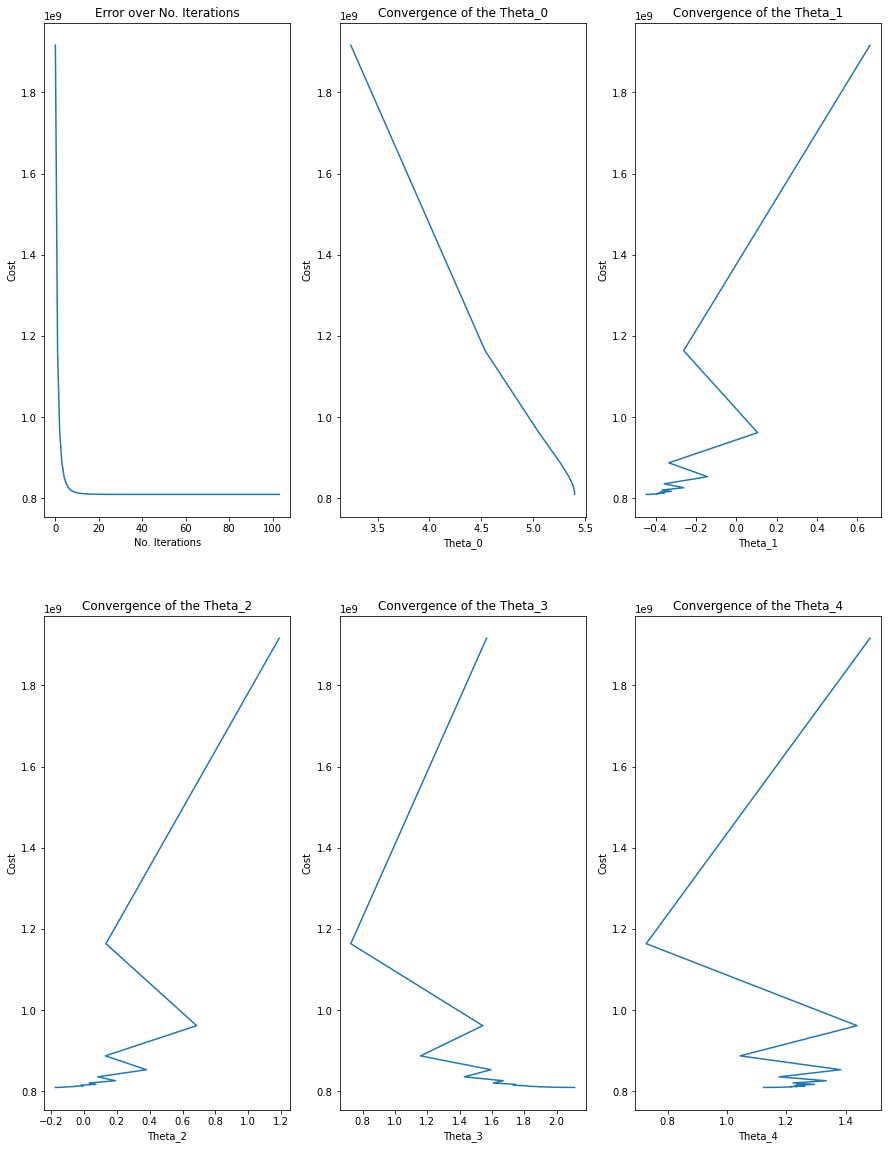

In [567]:
# using a large alpha, but there is still convergance, as a result there is an overshooting in some thetas

print("We will use a learning rate of alpha = 0.6",'\n')
print("Using a learing of 0.6 we are taking very large setp sizes and results in very gagged convergenceand some of the")
print("were overshot")
Linear_Regression_output = linearRegression(0.6,X_train,y_train, 0.000001)
print("final theta values:",'\n' ,Linear_Regression_output[0],'\n')
print("actual theta values:", '\n',closedFormSol(X_train,y_train),'\n')
print("Number of iterations:",'\n' ,Linear_Regression_output[1],'\n')
print("Cost History:",'\n' ,Linear_Regression_output[2][2:],'\n')
print("Theta History:",'\n' ,Linear_Regression_output[3],'\n')

XVals = np.arange(Linear_Regression_output[1])
fig, ax = plt.subplots(2,3, figsize = (15,20))
ax[0][0].plot(XVals,Linear_Regression_output[2][2:])
ax[0][0].set_xlabel('No. Iterations')
ax[0][0].set_ylabel('Cost')
ax[0][0].set_title('Error over No. Iterations')

ax[0][1].plot(Linear_Regression_output[3][1:,0:1],Linear_Regression_output[2][2:])
ax[0][1].set_xlabel('Theta_0')
ax[0][1].set_ylabel('Cost')
ax[0][1].set_title('Convergence of the Theta_0')

ax[0][2].plot(Linear_Regression_output[3][1:,1:2],Linear_Regression_output[2][2:])
ax[0][2].set_xlabel('Theta_1')
ax[0][2].set_ylabel('Cost')
ax[0][2].set_title('Convergence of the Theta_1')

ax[1][0].plot(Linear_Regression_output[3][1:,2:3],Linear_Regression_output[2][2:])
ax[1][0].set_xlabel('Theta_2')
ax[1][0].set_ylabel('Cost')
ax[1][0].set_title('Convergence of the Theta_2')

ax[1][1].plot(Linear_Regression_output[3][1:,3:4],Linear_Regression_output[2][2:])
ax[1][1].set_xlabel('Theta_3')
ax[1][1].set_ylabel('Cost')
ax[1][1].set_title('Convergence of the Theta_3')

ax[1][2].plot(Linear_Regression_output[3][1:,4:5],Linear_Regression_output[2][2:])
ax[1][2].set_xlabel('Theta_4')
ax[1][2].set_ylabel('Cost')
ax[1][2].set_title('Convergence of the Theta_4')

plt.show()

We will use a learning rate of alpha = 0.7 

Using a learing of 0.7 we are taking very large setp sizes and results in very gagged convergence and some of the
were overshot
final theta values: 
 [[ 5.3994537 ]
 [-0.44619438]
 [-0.17288739]
 [ 2.11133588]
 [ 1.123223  ]] 

actual theta values: 
 [[ 5.3994537 ]
 [-0.44619418]
 [-0.17288713]
 [ 2.11133615]
 [ 1.12322325]] 

Number of iterations: 
 1410 

Cost History: 
 [2.02748309e+09 1.66189775e+09 1.60012227e+09 ... 8.09546638e+08
 8.09546638e+08 8.09546638e+08] 

Theta History: 
 [[ 0.          0.          0.          0.          0.        ]
 [ 3.78308361  0.77364704  1.38547433  1.82809865  1.72918286]
 [ 4.91440686 -0.6124166  -0.27886088  0.38054842  0.41473351]
 ...
 [ 5.3994537  -0.44619438 -0.1728874   2.11133587  1.12322299]
 [ 5.3994537  -0.44619398 -0.17288687  2.11133643  1.1232235 ]
 [ 5.3994537  -0.44619438 -0.17288739  2.11133588  1.123223  ]] 



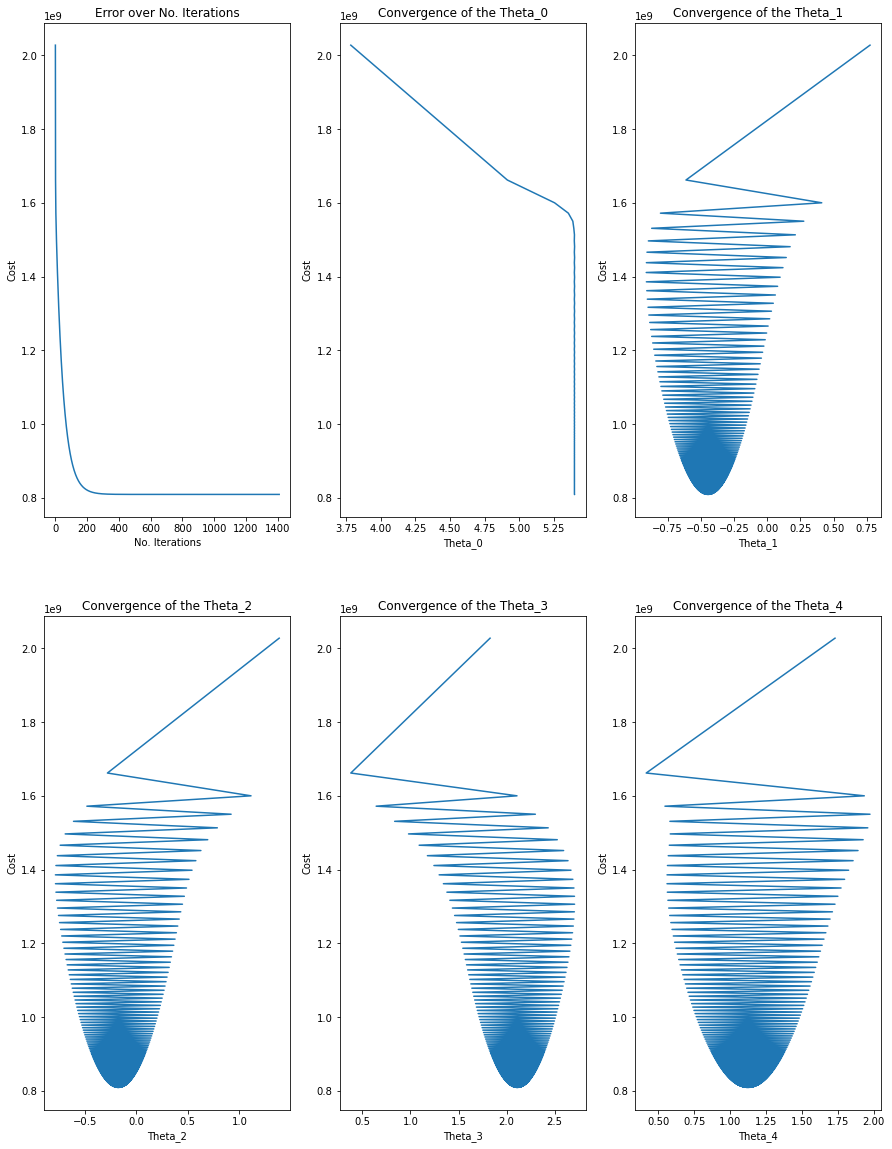

In [38]:
# using a large alpha, but there is still convergance, as a result there is an overshooting in some thetas

print("We will use a learning rate of alpha = 0.7",'\n')
print("Using a learing of 0.7 we are taking very large setp sizes and results in very gagged convergence and some of the")
print("were overshot")

Linear_Regression_output = linearRegression(0.7,X_train,y_train, 0.000001)
print("final theta values:",'\n' ,Linear_Regression_output[0],'\n')
print("actual theta values:", '\n',closedFormSol(X_train,y_train),'\n')
print("Number of iterations:",'\n' ,Linear_Regression_output[1],'\n')
print("Cost History:",'\n' ,Linear_Regression_output[2][2:],'\n')
print("Theta History:",'\n' ,Linear_Regression_output[3],'\n')

XVals = np.arange(Linear_Regression_output[1])
fig, ax = plt.subplots(2,3, figsize = (15,20))
ax[0][0].plot(XVals,Linear_Regression_output[2][2:])
ax[0][0].set_xlabel('No. Iterations')
ax[0][0].set_ylabel('Cost')
ax[0][0].set_title('Error over No. Iterations')

ax[0][1].plot(Linear_Regression_output[3][1:,0:1],Linear_Regression_output[2][2:])
ax[0][1].set_xlabel('Theta_0')
ax[0][1].set_ylabel('Cost')
ax[0][1].set_title('Convergence of the Theta_0')

ax[0][2].plot(Linear_Regression_output[3][1:,1:2],Linear_Regression_output[2][2:])
ax[0][2].set_xlabel('Theta_1')
ax[0][2].set_ylabel('Cost')
ax[0][2].set_title('Convergence of the Theta_1')

ax[1][0].plot(Linear_Regression_output[3][1:,2:3],Linear_Regression_output[2][2:])
ax[1][0].set_xlabel('Theta_2')
ax[1][0].set_ylabel('Cost')
ax[1][0].set_title('Convergence of the Theta_2')

ax[1][1].plot(Linear_Regression_output[3][1:,3:4],Linear_Regression_output[2][2:])
ax[1][1].set_xlabel('Theta_3')
ax[1][1].set_ylabel('Cost')
ax[1][1].set_title('Convergence of the Theta_3')

ax[1][2].plot(Linear_Regression_output[3][1:,4:5],Linear_Regression_output[2][2:])
ax[1][2].set_xlabel('Theta_4')
ax[1][2].set_ylabel('Cost')
ax[1][2].set_title('Convergence of the Theta_4')

plt.show()

In [39]:
#using an alpha that causes divergence

print("We will use a learning rate of alpha = 0.8",'\n')
print("Using a learing of 0.8 is too big as we can see that some of the theta values were oversot and some even diverged")
print("this results in us running into many errors")

Linear_Regression_output = linearRegression(0.72,X_train,y_train, 0.000001)
print("final theta values:",'\n' ,Linear_Regression_output[0],'\n')
print("actual theta values:", '\n',closedFormSol(X_train,y_train),'\n')
print("Number of iterations:",'\n' ,Linear_Regression_output[1],'\n')
print("Cost History:",'\n' ,Linear_Regression_output[2][2:],'\n')
print("Theta History:",'\n' ,Linear_Regression_output[3],'\n')

XVals = np.arange(Linear_Regression_output[1])
fig, ax = plt.subplots(2,3, figsize = (15,20))
ax[0][0].plot(XVals,Linear_Regression_output[2][2:])
ax[0][0].set_xlabel('No. Iterations')
ax[0][0].set_ylabel('Cost')
ax[0][0].set_title('Error over No. Iterations')

ax[0][1].plot(Linear_Regression_output[3][1:,0:1],Linear_Regression_output[2][2:])
ax[0][1].set_xlabel('Theta_0')
ax[0][1].set_ylabel('Cost')
ax[0][1].set_title('Convergence of the Theta_0')

ax[0][2].plot(Linear_Regression_output[3][1:,1:2],Linear_Regression_output[2][2:])
ax[0][2].set_xlabel('Theta_1')
ax[0][2].set_ylabel('Cost')
ax[0][2].set_title('Convergence of the Theta_1')

ax[1][0].plot(Linear_Regression_output[3][1:,2:3],Linear_Regression_output[2][2:])
ax[1][0].set_xlabel('Theta_2')
ax[1][0].set_ylabel('Cost')
ax[1][0].set_title('Convergence of the Theta_2')

ax[1][1].plot(Linear_Regression_output[3][1:,3:4],Linear_Regression_output[2][2:])
ax[1][1].set_xlabel('Theta_3')
ax[1][1].set_ylabel('Cost')
ax[1][1].set_title('Convergence of the Theta_3')

ax[1][2].plot(Linear_Regression_output[3][1:,4:5],Linear_Regression_output[2][2:])
ax[1][2].set_xlabel('Theta_4')
ax[1][2].set_ylabel('Cost')
ax[1][2].set_title('Convergence of the Theta_4')

plt.show()

We will use a learning rate of alpha = 0.8 

Using a learing of 0.8 is too big as we can see that some of the theta values were oversot and some even diverged
this results in us running into many errors


C:\Users\User\AppData\Local\Temp/ipykernel_16440/739855116.py:7: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/2*m) * np.sum(np.square(predictions-y))
C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_16440/739855116.py:7: RuntimeWarning: overflow encountered in square
  cost = (1/2*m) * np.sum(np.square(predictions-y))


final theta values: 
 [[5.15214663e+300]
 [3.00501963e+303]
 [3.94085830e+303]
 [            inf]
 [3.76453171e+303]] 

actual theta values: 
 [[ 5.3994537 ]
 [-0.44619418]
 [-0.17288713]
 [ 2.11133615]
 [ 1.12322325]] 

Number of iterations: 
 15441 

Cost History: 
 [2.07465973e+09 1.84661468e+09 1.89970406e+09 ...            inf
            inf            inf] 

Theta History: 
 [[ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000]
 [ 3.89117171e+000  7.95751245e-001  1.42505931e+000  1.88033004e+000
   1.77858809e+000]
 [ 4.97688920e+000 -6.93383266e-001 -3.76455390e-001  2.95157265e-001
   3.37137520e-001]
 ...
 [ 4.70598517e+300  2.74479335e+303  3.59959101e+303  3.79977910e+303
   3.43853381e+303]
 [-4.92401520e+300 -2.87196064e+303 -3.76636139e+303 -3.97582427e+303
  -3.59784235e+303]
 [ 5.15214663e+300  3.00501963e+303  3.94085830e+303              inf
   3.76453171e+303]] 



IndexError: index 0 is out of bounds for axis 0 with size 0

MSE of training:  6.171670120113657
MSE of test:  6.058489226668236


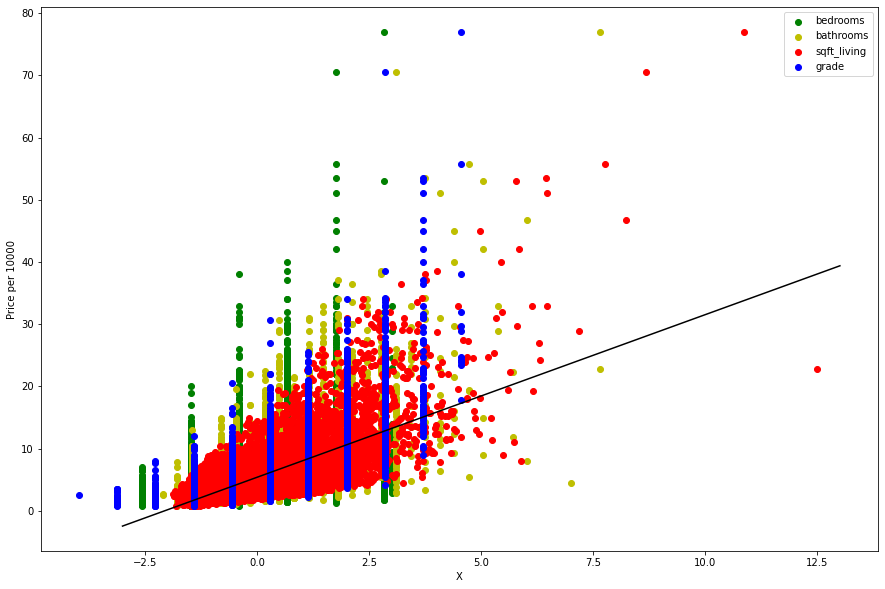

In [40]:
LR_thetas = linearRegression(0.08,X_train,y_train, 0.000001)

print("MSE of training: ",mean_squared_error(y_train,(h(X_train,LR_thetas[0]))))
print("MSE of test: ",mean_squared_error(y_test,(h(X_test,LR_thetas[0]))))


funcX = np.linspace(-3, 13,1000)
funcy= LR_thetas[0][0]+ (LR_thetas[0][1]*funcX)+(LR_thetas[0][2]*funcX)+(LR_thetas[0][3]*funcX)+(LR_thetas[0][4]*funcX)

fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(x = X_train[:,1:2], y = y_train, color = 'g', label= 'bedrooms')
ax.scatter(x = X_train[:,2:3], y = y_train,color = 'y',label= 'bathrooms')
ax.scatter(x = X_train[:,3:4], y = y_train, color = 'r',label= 'sqft_living')
ax.scatter(x = X_train[:,4:5], y = y_train,color = 'b',label= 'grade')
ax.plot(funcX,funcy, color ='k')
plt.xlabel("X")
plt.legend()
plt.ylabel("Price per 10000")

plt.show()

In [41]:
#test our trained model and find the mean sqared error
print("MSE of test on trained Model: ",'\t','\t',mean_squared_error(y_test,(h(X_test,LR_thetas[0]))))

#test the closed form using test data
print("MSE of test on Closed Form Solution: ",'\t',mean_squared_error(y_test,(h(X_test,ClosedForm))))

MSE of test on trained Model:  	 	 6.058489226668236
MSE of test on Closed Form Solution:  	 6.058489249353586


In [42]:
#test the model
#find closed form solution of test data
ClosedForm = closedFormSol(X_test,y_test)
print(ClosedForm)

[[ 5.40306615]
 [-0.36641509]
 [-0.28120817]
 [ 2.12312189]
 [ 1.13329911]]


MSE of test model:  	 	 	 6.051055506211189
MSE of test on Closed Form Solution:  	 6.0510555053543325


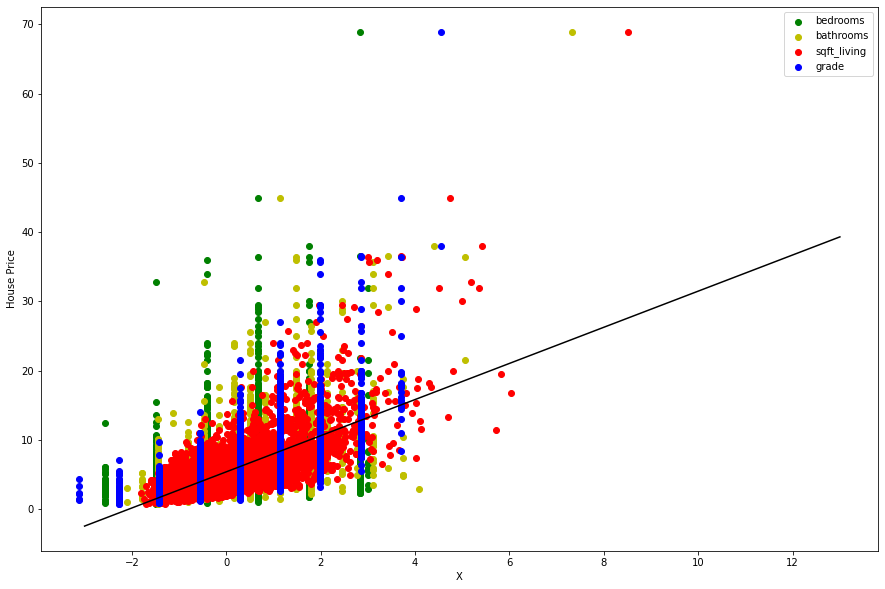

In [43]:
#test the model

LR_thetas = linearRegression(0.08,X_test,y_test, 0.000001)

print("MSE of test model: ",'\t','\t','\t',mean_squared_error(y_test,(h(X_test,LR_thetas[0]))))
print("MSE of test on Closed Form Solution: ",'\t',mean_squared_error(y_test,(h(X_test,ClosedForm))))

funcX = np.linspace(-3, 13,1000)
funcy= LR_thetas[0][0]+ (LR_thetas[0][1]*funcX)+(LR_thetas[0][2]*funcX)+(LR_thetas[0][3]*funcX)+(LR_thetas[0][4]*funcX)

fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(x = X_test[:,1:2], y = y_test, color = 'g',label= 'bedrooms')
ax.scatter(x = X_test[:,2:3], y = y_test,color = 'y',label= 'bathrooms')
ax.scatter(x = X_test[:,3:4], y = y_test, color = 'r',label= 'sqft_living')
ax.scatter(x = X_test[:,4:5], y = y_test,color = 'b',label= 'grade')
ax.plot(funcX,funcy, color ='k')
plt.xlabel("X")
plt.legend()
plt.ylabel("House Price")

plt.show()

In [44]:
#running some regularization 
#lamda = 10

LR_thetas = linearRegression(0.08,X_train,y_train, 0.000001)
LR_reg_thetas =linear_reg_with_regularization(0.08, X_train, y_train,0.000001,10)
print("lamda =", 10,'\n')
print("Thetas without regularization",'\n',LR_thetas[0],'\n')
print("Thetas with regularization",'\n',LR_reg_thetas[0],'\n')
print("num iters without regularization",LR_thetas[1])
print("num iters with regularization",LR_reg_thetas[1],'\n')
print("MSE of training model without regularizaion: ",mean_squared_error(y_train,(h(X_train,LR_thetas[0]))))
print("MSE of training model with regularization: ",mean_squared_error(y_train,(h(X_train,LR_reg_thetas[0]))))

lamda = 10 

Thetas without regularization 
 [[ 5.39945383]
 [-0.44617629]
 [-0.1728747 ]
 [ 2.11128192]
 [ 1.12325588]] 

Thetas with regularization 
 [[ 5.3994592 ]
 [-0.4446537 ]
 [-0.17072833]
 [ 2.10711732]
 [ 1.1237617 ]] 

num iters without regularization 671
num iters with regularization 669 

MSE of training model without regularizaion:  6.171670120113657
MSE of training model with regularization:  6.171675939305415


In [45]:
#running some regularization 
#lamda = 5

LR_thetas = linearRegression(0.08,X_train,y_train, 0.000001)
LR_reg_thetas =linear_reg_with_regularization(0.08, X_train, y_train,0.000001,5)
print("lamda =", 5,'\n')
print("Thetas without regularization",'\n',LR_thetas[0],'\n')
print("Thetas with regularization",'\n',LR_reg_thetas[0],'\n')
print("num iters without regularization",LR_thetas[1])
print("num iters with regularization",LR_reg_thetas[1],'\n')
print("MSE of training model without regularizaion: ",mean_squared_error(y_train,(h(X_train,LR_thetas[0]))))
print("MSE of training model with regularization: ",mean_squared_error(y_train,(h(X_train,LR_reg_thetas[0]))))

lamda = 5 

Thetas without regularization 
 [[ 5.39945383]
 [-0.44617629]
 [-0.1728747 ]
 [ 2.11128192]
 [ 1.12325588]] 

Thetas with regularization 
 [[ 5.39945652]
 [-0.445414  ]
 [-0.17180006]
 [ 2.1091964 ]
 [ 1.12351   ]] 

num iters without regularization 671
num iters with regularization 670 

MSE of training model without regularizaion:  6.171670120113657
MSE of training model with regularization:  6.171671605847309


In [46]:
#running some regularization 
#lamda = 20

LR_thetas = linearRegression(0.08,X_train,y_train, 0.000001)
LR_reg_thetas =linear_reg_with_regularization(0.08, X_train, y_train,0.000001,20)
print("lamda =", 20,'\n')
print("Thetas without regularization",'\n',LR_thetas[0],'\n')
print("Thetas with regularization",'\n',LR_reg_thetas[0],'\n')
print("num iters without regularization",LR_thetas[1])
print("num iters with regularization",LR_reg_thetas[1],'\n')
print("MSE of training model without regularizaion: ",mean_squared_error(y_train,(h(X_train,LR_thetas[0]))))
print("MSE of training model with regularization: ",mean_squared_error(y_train,(h(X_train,LR_reg_thetas[0]))))

lamda = 20 

Thetas without regularization 
 [[ 5.39945383]
 [-0.44617629]
 [-0.1728747 ]
 [ 2.11128192]
 [ 1.12325588]] 

Thetas with regularization 
 [[ 5.39946455]
 [-0.44313876]
 [-0.16859338]
 [ 2.10297755]
 [ 1.12425841]] 

num iters without regularization 671
num iters with regularization 666 

MSE of training model without regularizaion:  6.171670120113657
MSE of training model with regularization:  6.17169306267613


In [47]:
#running some regularization 
#lamda = 1

LR_thetas = linearRegression(0.08,X_train,y_train, 0.000001)
LR_reg_thetas =linear_reg_with_regularization(0.08, X_train, y_train,0.000001,1)
print("lamda =", 1,'\n')
print("Thetas without regularization",'\n',LR_thetas[0],'\n')
print("Thetas with regularization",'\n',LR_reg_thetas[0],'\n')
print("num iters without regularization",LR_thetas[1])
print("num iters with regularization",LR_reg_thetas[1],'\n')
print("MSE of training model without regularizaion: ",mean_squared_error(y_train,(h(X_train,LR_thetas[0]))))
print("MSE of training model with regularization: ",mean_squared_error(y_train,(h(X_train,LR_reg_thetas[0]))))

lamda = 1 

Thetas without regularization 
 [[ 5.39945383]
 [-0.44617629]
 [-0.1728747 ]
 [ 2.11128192]
 [ 1.12325588]] 

Thetas with regularization 
 [[ 5.39945437]
 [-0.44602372]
 [-0.17265957]
 [ 2.11086446]
 [ 1.1233068 ]] 

num iters without regularization 671
num iters with regularization 671 

MSE of training model without regularizaion:  6.171670120113657
MSE of training model with regularization:  6.171670188317305
